In [21]:
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv('../../data/beauty.csv', sep=';')

In [14]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [20]:
df['wage'].describe()

count    1260.000000
mean        6.306690
std         4.660639
min         1.020000
25%         3.707500
50%         5.300000
75%         7.695000
max        77.720000
Name: wage, dtype: float64

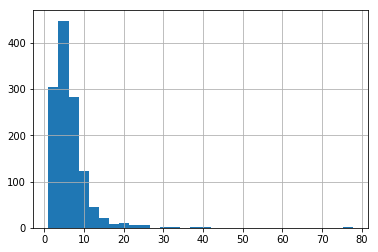

In [23]:
df['wage'].hist(bins=30);

In [25]:
stats_df = df.describe()

In [27]:
stats_df['union']

count    1260.000000
mean        0.272222
std         0.445280
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: union, dtype: float64

In [28]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Indexing data

### iloc

In [30]:
df.iloc[:10, 5]

0    1
1    1
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: female, dtype: int64

### loc

In [32]:
df.loc[:10, ['wage', 'exper', 'educ']]

,wage,exper,educ
0,5.73,30,14
1,4.28,28,12
2,7.96,35,10
3,11.57,38,16
4,11.42,27,16
5,3.91,20,12
6,8.76,12,16
7,7.69,5,16
8,5.00,5,16
9,3.89,12,12


In [36]:
toy_df = pd.DataFrame({'age': [40, 45, 32],
                       'salary': [78, 45, 67]}, 
                      index=['Kate', 'Leo', 'Max'])

In [37]:
toy_df

,age,salary
Kate,40,78
Leo,45,45
Max,32,67


In [38]:
toy_df.loc[['Kate', 'Leo'], 'age']

Kate    40
Leo     45
Name: age, dtype: int64

In [45]:
df[(df['wage'] > 40) 
   & (df['female'] == 0)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4


In [47]:
df.loc[df['female'] == 0, 'married'].mean()

0.7985436893203883

In [48]:
df.loc[df['female'] == 1, 'married'].mean()

0.48853211009174313

In [49]:
df.shape

(1260, 10)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


In [51]:
df['wage'].mean(), df['wage'].median()

(6.306690476190469, 5.3)

In [53]:
df['looks'].unique()

array([4, 3, 2, 5, 1])

In [54]:
df['looks'].value_counts()

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [56]:
df['female'].value_counts(normalize=True)

0    0.653968
1    0.346032
Name: female, dtype: float64

### GroupBy

In [60]:
for (gender, sub_dataframe) in df.groupby('female'):
    print("Female: %d " % gender)
    
    print('Median wage')
    print(sub_dataframe['wage'].median())

Female: 0 
Median wage
6.41
Female: 1 
Median wage
3.75


In [62]:
df.groupby(['married', 'female'])['wage', 'looks'].median()

wage  looks
married female              
0       0       5.065      3
        1       3.890      3
1       0       6.710      3
        1       3.580      3

In [63]:
pd.crosstab(df['married'], df['female'])

female,0,1
married,,
0,166,223
1,658,213


### apply

In [65]:
def gender_as_string(gender_id):
    
    '''
    if gender_id == 1:
         return 'female'
    else:
         return 'male'
    '''
    
    return 'female' if gender_id else 'male'

In [67]:
df['female'].apply(gender_as_string).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [68]:
df['female'].apply(lambda gender_id: 
                   'female' if gender_id else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [70]:
df['female'].map({1 : 'female', 0: 'male' }).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [71]:
DOLLAR_TO_EURO = 0.84

In [73]:
df['wage'].apply(lambda w: w / DOLLAR_TO_EURO).head()

0     6.821429
1     5.095238
2     9.476190
3    13.773810
4    13.595238
Name: wage, dtype: float64

In [75]:
(df['wage'] / DOLLAR_TO_EURO).head()

0     6.821429
1     5.095238
2     9.476190
3    13.773810
4    13.595238
Name: wage, dtype: float64

In [79]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

In [77]:
df['educ'].nunique()

8

In [80]:
import numpy as np

In [81]:
df.groupby('educ')['wage'].agg([np.mean, np.median])

,mean,median
educ,,
5,4.587857,4.26
8,4.969091,3.97
10,5.524295,4.45
12,5.698205,4.81
13,6.642642,5.29
14,5.613529,5.39
16,7.792645,7.21
17,8.661061,6.90


In [83]:
# pip install seaborn
import seaborn as sns
sns.set()

### IQR = qrt_75 - qrt_25

In [88]:
df['wage'].median(), df['wage'].mean()

(5.3, 6.306690476190469)

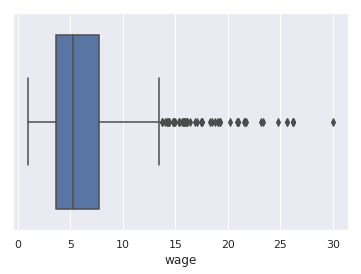

In [86]:
sns.boxplot(x='wage', data=df[df['wage'] < 30])

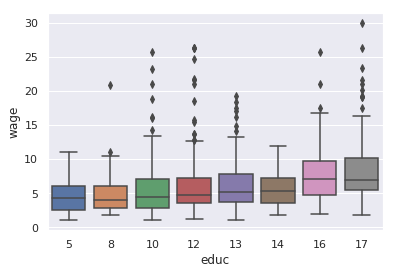

In [90]:
sns.boxplot(x='educ', y='wage', data=df[df['wage'] < 30]);

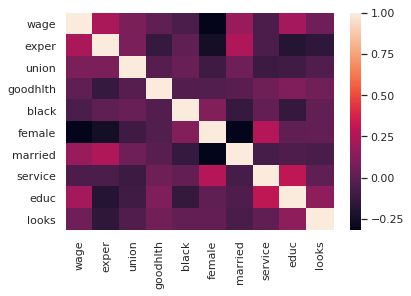

In [93]:
sns.heatmap(df.corr());

In [98]:
df.corrwith(df['wage'])

wage        1.000000
exper       0.234632
union       0.094529
goodhlth    0.006756
black      -0.059052
female     -0.313419
married     0.184521
service    -0.053653
educ        0.212333
looks       0.055019
dtype: float64

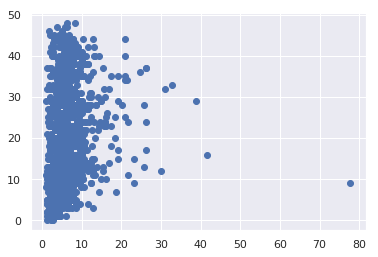

In [101]:
plt.scatter(df['wage'], df['exper']);

In [103]:
df[df['looks'].isin([1, 3, 5])]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1,4.28,28,0,1,0,1,1,0,12,3
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
6,8.76,12,0,1,0,0,1,0,16,3
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3
13,3.00,8,0,1,0,0,0,1,16,3
16,5.16,7,0,1,0,0,1,0,17,3
19,7.69,7,0,1,0,1,1,1,16,3
